# Assignment - Data Exploration 1 - Checkpoint 5, Module 14: Model Preparation
### by Jaz Viccarro

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.stats import ttest_ind
from sqlalchemy import create_engine
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()


##### handle missing values before EDA

In [75]:
missing = pd.DataFrame(df.isnull().sum() * 100 / len(df), columns=["Missing Values %"])
missing = missing.sort_values(by="Missing Values %", ascending=False)
missing = missing.round(0)
missing = missing[missing['Missing Values %'] != 0]
len(missing.index)
missing.index

Index(['AVG_READING_8_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE',
       'AVG_MATH_4_SCORE', 'ENROLL', 'OTHER_EXPENDITURE',
       'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'TOTAL_EXPENDITURE', 'LOCAL_REVENUE',
       'STATE_REVENUE', 'FEDERAL_REVENUE', 'TOTAL_REVENUE', 'GRADES_PK_G',
       'GRADES_ALL_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G',
       'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G'],
      dtype='object')

In [76]:
missing_vals_cols = []
# ignore_cols = ['AVG_READING_8_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE','AVG_MATH_4_SCORE']

for item in missing.index:
        missing_vals_cols.append(item)
    # will need to add more code to remove ignore_cols

In [77]:
missing_vals_cols = ['ENROLL',
 'OTHER_EXPENDITURE',
 'INSTRUCTION_EXPENDITURE',
 'SUPPORT_SERVICES_EXPENDITURE',
 'CAPITAL_OUTLAY_EXPENDITURE',
 'TOTAL_EXPENDITURE',
 'LOCAL_REVENUE',
 'STATE_REVENUE',
 'FEDERAL_REVENUE',
 'TOTAL_REVENUE',
 'GRADES_PK_G',
 'GRADES_ALL_G',
 'GRADES_KG_G',
 'GRADES_4_G',
 'GRADES_8_G',
 'GRADES_12_G',
 'GRADES_1_8_G',
 'GRADES_9_12_G']

In [78]:
df1 = df.copy()

states = df1['STATE'].unique() # use state as the index


for state in states:
    df1.loc[df1["STATE"] == state, missing_vals_cols] = df1.loc[df1["STATE"] == state, missing_vals_cols].interpolate()

In [80]:
df1.dropna(inplace=True)

## 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.


In [83]:
df1.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,...,466.00000,466.00000,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.000000,466.000000
mean,2008.577253,9.442125e+05,1.078853e+07,9.568659e+05,4.999548e+06,4.832112e+06,1.086947e+07,5.638251e+06,3.181222e+06,4.913261e+05,...,72515.82618,72917.07618,64773.880901,5.836186e+05,2.867026e+05,8.933042e+05,236.909728,279.802668,219.508638,263.789943
std,5.779779,1.122051e+06,1.356335e+07,1.330702e+06,6.405481e+06,6.325995e+06,1.373667e+07,7.255903e+06,3.840941e+06,6.009649e+05,...,86463.95300,85835.16237,77557.604833,6.925615e+05,3.408161e+05,1.060080e+06,8.695903,9.381511,7.426546,6.875627
min,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,2.310700e+04,...,3423.00000,2860.00000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,2005.000000,2.794832e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.513430e+05,2.670300e+06,1.416288e+06,8.472295e+05,1.296515e+05,...,20489.75000,20880.25000,18527.750000,1.666395e+05,8.194400e+04,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,2009.000000,6.639415e+05,6.106834e+06,5.544340e+05,3.021544e+06,2.442983e+06,6.249671e+06,3.186679e+06,1.899310e+06,3.271845e+05,...,50918.00000,50114.50000,41543.000000,4.067475e+05,1.868900e+05,6.264775e+05,238.394124,281.531587,221.130461,265.217081
75%,2013.000000,1.018588e+06,1.222407e+07,1.033414e+06,6.240349e+06,5.488079e+06,1.195951e+07,6.154768e+06,3.667420e+06,5.609385e+05,...,79929.50000,80949.75000,75641.250000,6.424952e+05,3.234915e+05,9.758625e+05,242.602566,286.197041,224.531280,268.307884
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.00000,500143.00000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130


Remarkable points: 
- The deficit between the maximum values for FEDERAL_REVENUE, STATE_REVENUE, LOCAL_REVENUE is interesting
- The differnce between TOTAL_EXPENDITURE and TOTAL_REVENUE is notable as it indicates there is more money being made than spent overall; slightly unsettling. 
- The difference in standard deviation between AVG_READING_8_SCORE and AVG_MATH_4_SCORE is interesting given that they are decently correlated (_Subject matter expertise_)
_________________________________________

## 2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates. In your chosen state, which of the lessons are the students more successful, math or reading?

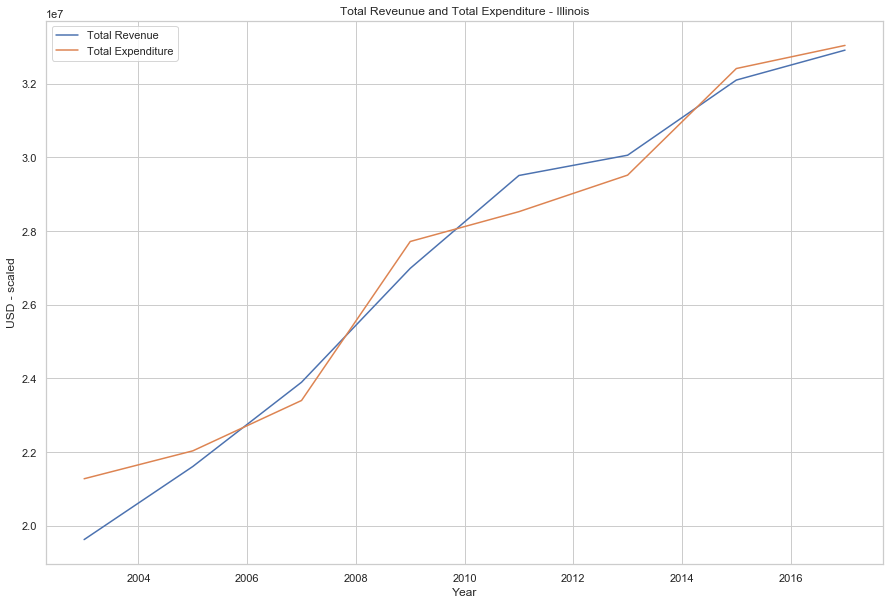

In [91]:
plt.figure(figsize=(15,10))

plt.plot(df1.loc[df1.STATE == 'ILLINOIS', 'YEAR'], df1.loc[df1.STATE == 'ILLINOIS', 'TOTAL_REVENUE'], label='Total Revenue')
plt.plot(df1.loc[df1.STATE == 'ILLINOIS', 'YEAR'], df1.loc[df1.STATE == 'ILLINOIS', 'TOTAL_EXPENDITURE'], label='Total Expenditure')

plt.title('Total Reveunue and Total Expenditure - Illinois')
plt.xlabel('Year')
plt.ylabel('USD - scaled')
plt.legend()
plt.show();
        



>As we see illustrated in the line grpah above, there are certain years where spending and revenue overturn each other; some years Illinois is spending more than it's earning and vice versa.  Possibly explainations could be economic factors; performance metrics affecting legislations, change in state mandated adminstered tests, etc. Administration turnover, local politics versus state politics given Illinois has a globally major city, could be at play in these data.
_________________________________________

## 4. What are the distributions of the math and reading scores in the sample?


Here's a stacked histogram 'for show':

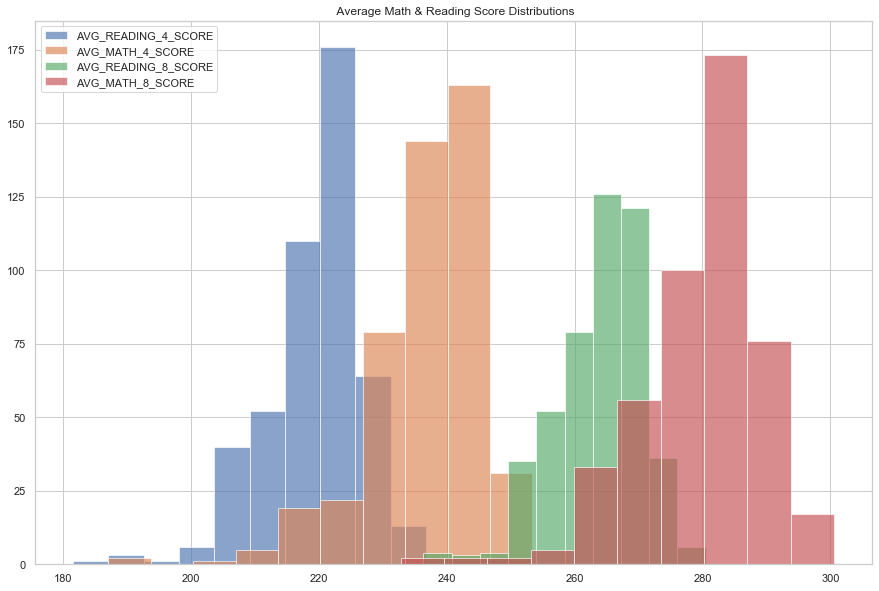

In [113]:
plt.figure(figsize=(15,10))

plt.hist(df1.AVG_READING_4_SCORE.dropna(), alpha=.65);
plt.hist(df1.AVG_MATH_4_SCORE.dropna(), alpha=.65);
plt.hist(df1.AVG_READING_8_SCORE.dropna(), alpha=.65);
plt.hist(df1.AVG_MATH_8_SCORE.dropna(), alpha=.65);
plt.title(' Average Math & Reading Score Distributions')
plt.legend(['AVG_READING_4_SCORE', 'AVG_MATH_4_SCORE', 'AVG_READING_8_SCORE','AVG_MATH_8_SCORE'])
plt.show()

## Here are the subplots of the Avg. Math and Avg. Reading Scores:

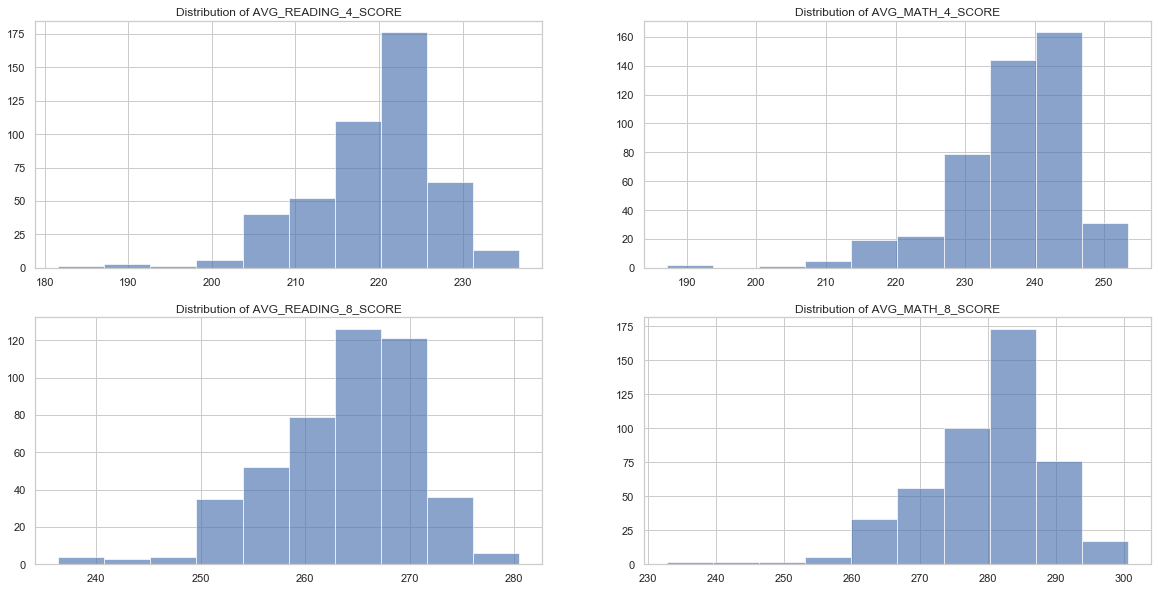

In [115]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(df1.AVG_READING_4_SCORE.dropna(), alpha=.65);
plt.title('Distribution of {}'.format('AVG_READING_4_SCORE'))

plt.subplot(2,2,2)
plt.hist(df1.AVG_MATH_4_SCORE.dropna(), alpha=.65);
plt.title('Distribution of {}'.format('AVG_MATH_4_SCORE'))

plt.subplot(2,2,3)
plt.hist(df1.AVG_READING_8_SCORE.dropna(), alpha=.65);
plt.title('Distribution of {}'.format('AVG_READING_8_SCORE'))

plt.subplot(2,2,4)
plt.hist(df1.AVG_MATH_8_SCORE.dropna(), alpha=.65);
plt.title('Distribution of {}'.format('AVG_MATH_8_SCORE'))
plt.show()


##### you'll see above the distributions of all score subsets are not normal, and, are negagtively skewed, meaning that the average score in each subset falls below the median or "middle-of-the-road" score.

## 5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [118]:
df2 = df.copy()

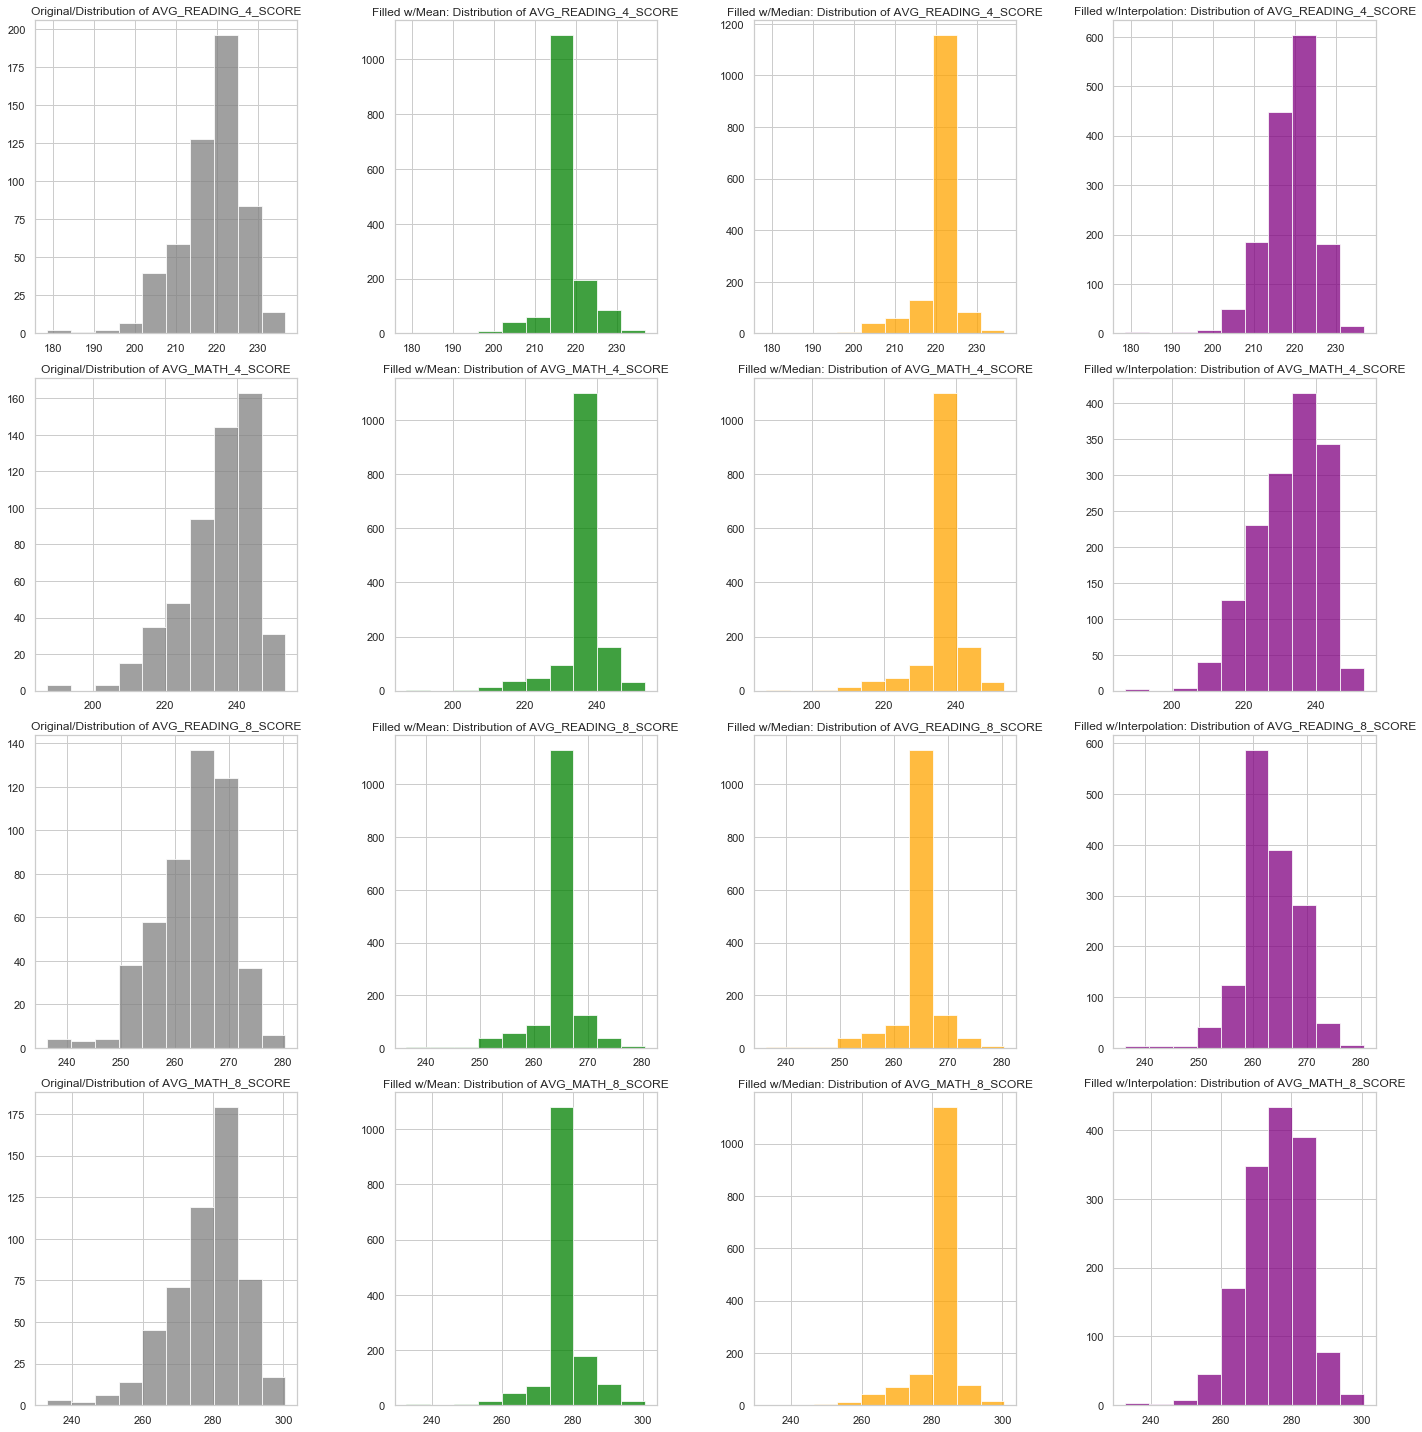

In [169]:
w0 = df2.AVG_READING_4_SCORE.dropna()
w1 = df2.AVG_READING_4_SCORE.fillna(df2.AVG_READING_4_SCORE.mean())
w2 = df2.AVG_READING_4_SCORE.fillna(df2.AVG_READING_4_SCORE.median())
w3 = df2.AVG_READING_4_SCORE.interpolate()

x0 = df2.AVG_MATH_4_SCORE.dropna()
x1 = df2.AVG_MATH_4_SCORE.fillna(df2.AVG_MATH_4_SCORE.mean())
x2 = df2.AVG_MATH_4_SCORE.fillna(df2.AVG_MATH_4_SCORE.median())
x3 = df2.AVG_MATH_4_SCORE.interpolate()

y0 = df2.AVG_READING_8_SCORE.dropna()
y1 = df2.AVG_READING_8_SCORE.fillna(df2.AVG_READING_8_SCORE.mean())
y2 = df2.AVG_READING_8_SCORE.fillna(df2.AVG_READING_8_SCORE.median())
y3 = df2.AVG_READING_8_SCORE.interpolate()

z0 = df2.AVG_MATH_8_SCORE.dropna()
z1 = df2.AVG_MATH_8_SCORE.fillna(df2.AVG_MATH_8_SCORE.mean())
z2 = df2.AVG_MATH_8_SCORE.fillna(df2.AVG_MATH_8_SCORE.median())
z3 = df2.AVG_MATH_8_SCORE.interpolate()


plt.figure(figsize=(20,20))

from IPython.core.display import display, HTML
display(HTML('<h1>Different Distributions using Different Fill Methods in Pandas. <br>Key-- Grey = Original, Green = Mean, Orange = Median, Purple = Interpolation</h1>'))

#AVG_READING_4_SCORE
plt.subplot(4,4,1)
plt.hist(w0, alpha=.75, color='grey');
plt.title('Original/Distribution of {}'.format('AVG_READING_4_SCORE'))

plt.subplot(4,4,2)
plt.hist(w1, alpha=.75, color='green');
plt.title('Filled w/Mean: Distribution of {}'.format('AVG_READING_4_SCORE'))

plt.subplot(4,4,3)
plt.hist(w2, alpha=.75, color='orange');
plt.title('Filled w/Median: Distribution of {}'.format('AVG_READING_4_SCORE'))

plt.subplot(4,4,4)
plt.hist(w3, alpha=.75, color='purple');
plt.title('Filled w/Interpolation: Distribution of {}'.format('AVG_READING_4_SCORE'))

#AVG_MATH_4_SCORE
plt.subplot(4,4,5)
plt.hist(x0, alpha=.75, color='grey');
plt.title('Original/Distribution of {}'.format('AVG_MATH_4_SCORE'))

plt.subplot(4,4,6)
plt.hist(x1, alpha=.75, color='green');
plt.title('Filled w/Mean: Distribution of {}'.format('AVG_MATH_4_SCORE'))

plt.subplot(4,4,7)
plt.hist(x2, alpha=.75, color='orange');
plt.title('Filled w/Median: Distribution of {}'.format('AVG_MATH_4_SCORE'))

plt.subplot(4,4,8)
plt.hist(x3, alpha=.75, color='purple');
plt.title('Filled w/Interpolation: Distribution of {}'.format('AVG_MATH_4_SCORE'))

#AVG_READING_8_SCORE
plt.subplot(4,4,9)
plt.hist(y0, alpha=.75, color='grey');
plt.title('Original/Distribution of {}'.format('AVG_READING_8_SCORE'))

plt.subplot(4,4,10)
plt.hist(y1, alpha=.75, color='green');
plt.title('Filled w/Mean: Distribution of {}'.format('AVG_READING_8_SCORE'))

plt.subplot(4,4,11)
plt.hist(y2, alpha=.75, color='orange');
plt.title('Filled w/Median: Distribution of {}'.format('AVG_READING_8_SCORE'))

plt.subplot(4,4,12)
plt.hist(y3, alpha=.75, color='purple');
plt.title('Filled w/Interpolation: Distribution of {}'.format('AVG_READING_8_SCORE'))

# AVG_MATH_8_SCORE
plt.subplot(4,4,13)
plt.hist(z0, alpha=.75, color='grey');
plt.title('Original/Distribution of {}'.format('AVG_MATH_8_SCORE'))

plt.subplot(4,4,14)
plt.hist(z1, alpha=.75, color='green');
plt.title('Filled w/Mean: Distribution of {}'.format('AVG_MATH_8_SCORE'))

plt.subplot(4,4,15)
plt.hist(z2, alpha=.75, color='orange');
plt.title('Filled w/Median: Distribution of {}'.format('AVG_MATH_8_SCORE'))


plt.subplot(4,4,16)
plt.hist(z3, alpha=.75, color='purple');
plt.title('Filled w/Interpolation: Distribution of {}'.format('AVG_MATH_8_SCORE'))

plt.tight_layout()
plt.show()


## The different fill methods used on the subsets of scores changes the distributions almost dramatically.  I think the most notable transformation can be seen in the AVG_MATH_8_SCORE subplot, where the interpolation method seems to normalize values the best. Overall, the intepolation method is the best when handling these values.